**Import Libraries**

In [61]:
import pandas as pd #load and manipulate data and one hot encoding
import numpy as np #calculate mean and STD
import matplotlib.pyplot as plt #drawing graphs
from sklearn.tree import DecisionTreeClassifier #classifiation model
from sklearn.tree import plot_tree  #plotting tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


**Import Data**

In [62]:
df= pd.read_csv('processed.cleveland.data.csv', header=None)

In [63]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [64]:
df.columns=['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd'] 

In [65]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [66]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

**Cleaning the Data-Removing Missing Values**

In [67]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [68]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [69]:
len(df.loc[(df['ca']=='?')
           |
           (df['thal']=='?')])

6

In [70]:
df.loc[(df['ca']=='?')
           |
           (df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [71]:
len(df)

303

In [72]:
df_no_missing = df.loc[(df['ca']!='?')
           &
           (df['thal']!='?')]

In [73]:
len(df_no_missing)

297

In [74]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [75]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

**Spitting Data**

In [76]:
X=df_no_missing.drop('hd', axis=1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [77]:
y=df_no_missing['hd'].copy()

In [78]:
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

**One Hot Encoding-Using Get_dummies**

In [79]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [80]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [81]:
pd.get_dummies(X, columns=['cp']).head() #checking the get_dummies method

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [82]:
X_encoded=pd.get_dummies(X, columns=['cp','restecg','thal','slope'])
X_encoded

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,thal_3.0,thal_6.0,thal_7.0,slope_1.0,slope_2.0,slope_3.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,1,0,0,0,1
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,1,0,0,0,1,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,0,1,0,1,0
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,1,0,0,0,0,1
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,0,...,1,1,0,0,0,0,1,0,1,0
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,1,...,0,1,0,0,0,0,1,0,1,0
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,0,...,1,1,0,0,0,0,1,0,1,0
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,0,...,1,1,0,0,0,0,1,0,1,0


In [83]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [84]:
y_not_zero_index= y>0
y[y_not_zero_index]= 1
y.unique()

array([0, 1], dtype=int64)

**Building a Priliminary classification tree**

In [85]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42)
clf_dt= DecisionTreeClassifier(random_state=42)
clf_dt= clf_dt.fit(X_train,y_train)

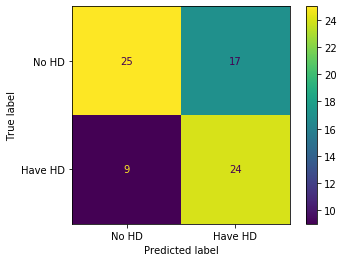

In [86]:
plot_confusion_matrix(clf_dt,X_test,y_test, display_labels=['No HD','Have HD'])

**Solving Overfitting-finding ideal alpha value**

In [87]:
path= clf_dt.cost_complexity_pruning_path(X_train,y_train) #solving overfitting by pruning
ccp_alphas, impurities= path.ccp_alphas, path.impurities
ccp_alphas=ccp_alphas[:-1]

clf_dts=[] # creating an of classification DTs
for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train,y_train)
    clf_dts.append(clf_dt)
    


*Graphing the training dataset and testing data set as a function of alpha*

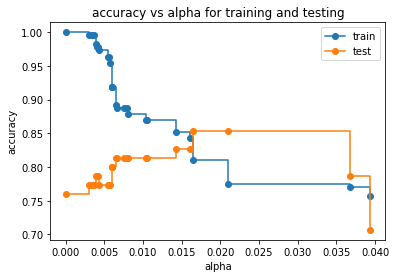

In [88]:
train_scores=[clf_dt.score(X_train,y_train) for clf_dt in clf_dts] #extract the accuracies of classification
test_scores= [clf_dt.score(X_test,y_test) for clf_dt in clf_dts]

fig,ax= plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('accuracy vs alpha for training and testing')
ax.plot(ccp_alphas,train_scores, marker='o', label='train',drawstyle='steps-post')
ax.plot(ccp_alphas,test_scores, marker='o',label='test', drawstyle='steps-post')
ax.legend()
plt.show()

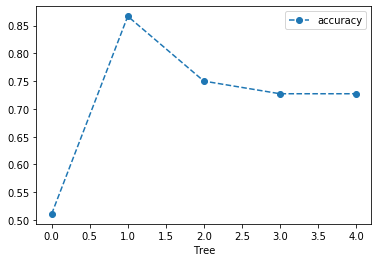

In [89]:
#Cross Vlaidation for finding the best alpha
clf_dt=DecisionTreeClassifier(random_state=42, ccp_alpha=0.016) #creating a new DT
scores=cross_val_score(clf_dt,X_train,y_train,cv=5)
df=pd.DataFrame(data={'Tree': range(5), 'accuracy':scores})
df.plot(x='Tree',y='accuracy', marker='o', linestyle= '--' )

#We see that different training and testing data set results in different accuracies

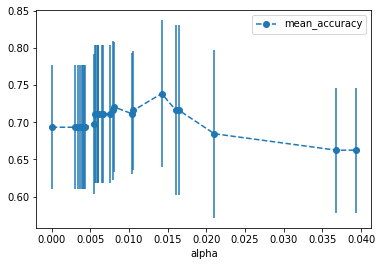

In [90]:
#find optimal value ccp_alpha using cross validation
alpha_loop_values=[]
for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores=cross_val_score(clf_dt,X_train,y_train,cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results= pd.DataFrame(alpha_loop_values, columns=['alpha','mean_accuracy','STD'])

alpha_results.plot(x='alpha',y='mean_accuracy',yerr='STD',marker='o', linestyle= '--' )
    

In [91]:
alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha'] <0.015) ]

,alpha,mean_accuracy,STD
21,0.014225,0.738788,0.098832


In [92]:
ideal_ccp_alpha=alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha'] <0.015)]['alpha']
ideal_ccp_alpha

21    0.014225
Name: alpha, dtype: float64

In [93]:
ideal_ccp_alpha=float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

**Final Classification**

In [94]:
clf_dt_pruned= DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned= clf_dt_pruned.fit(X_train,y_train)

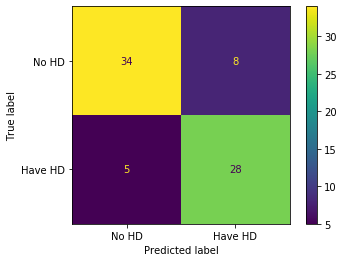

In [95]:
plot_confusion_matrix(clf_dt_pruned,X_test,y_test, display_labels=['No HD','Have HD'])

*plotting pruned tree*

[Text(482.8846153846154, 356.7375, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = NO HD'),
 Text(257.53846153846155, 254.8125, 'thal <= 6.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = NO HD'),
 Text(128.76923076923077, 152.8875, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = NO HD'),
 Text(64.38461538461539, 50.96249999999998, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = NO HD'),
 Text(193.15384615384616, 50.96249999999998, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Yes HD'),
 Text(386.3076923076923, 152.8875, 'cp <= 3.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = Yes HD'),
 Text(321.9230769230769, 50.96249999999998, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = NO HD'),
 Text(450.69230769230774, 50.96249999999998, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Yes HD'),
 Text(708.2307692307693, 254.8125, 'cp <= 3.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = Yes HD'),
 Text(6

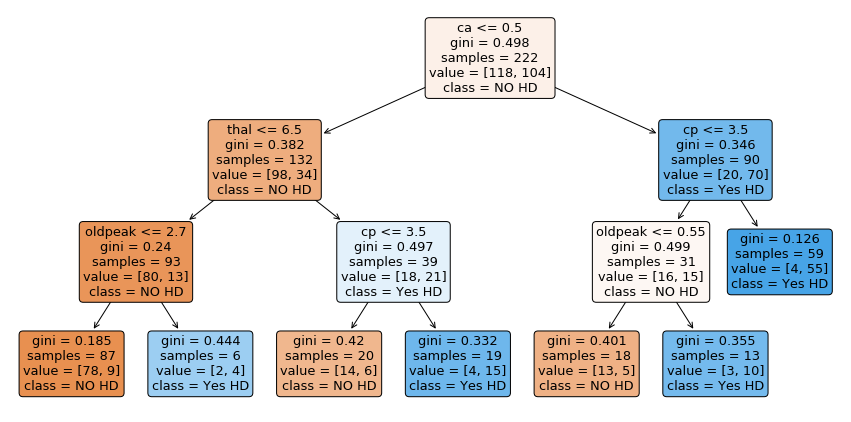

In [96]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,filled=True, rounded=True,class_names=['NO HD','Yes HD'],feature_names=X.columns)
